# GRAFICOS EMPRESA ALIADA
#### (Tarea 2)

Vamos a importar las librerias que vamos a usar

Ademas de abrir nuestro archivo del "df_final" de la tarea pasada

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df2 = pd.read_csv ('DIM_CATEGORY (2).csv')
df = pd.read_csv("DataFrame_final_Tarea1.csv")
df.head(5)

,Unnamed: 0,WEEK,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES,TOTAL_UNIT_AVG_WEEKLY_SALES,REGION,YEAR,MONTH,WEEK_NUMBER,...,MANUFACTURER,BRAND,ITEM,ITEM_DESCRIPTION,CATEGORY,FORMAT,ATTR1,ATTR2,ATTR3,SEGMENT
0,0,34-22,7501058792808BP2,0.006,0.139,1.000,TOTAL AUTOS AREA 5,2022,8,34,...,RECKITT,VANISH,7501058792808BP2,VANISHOXIACTIONROSADOYPACK120GR+MMCRYSTALWHITE...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER
1,1,34-22,7501058715883,0.487,116.519,2.916,TOTAL AUTOS AREA 5,2022,8,34,...,RECKITT,VANISH,7501058715883,VANISH OXI ACTION GOLD QUITAMANCHAS BOLSA 1.8K...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER
2,2,34-22,7702626213774,1.391,68.453,5.171,TOTAL AUTOS AREA 5,2022,8,34,...,RECKITT,VANISH,7702626213774,VANISH OXI ACTION ROSA QUITAMANCHAS DOYPACK 24...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER
3,3,34-22,7501058716422,0.022,1.481,1.833,TOTAL AUTOS AREA 5,2022,8,34,...,RECKITT,VANISH,7501058716422,VANISH OXI ACTION GOLD QUITAMANCHA AHORRO DEL ...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER
4,4,34-22,7501058784353,2.037,182.839,5.375,TOTAL AUTOS AREA 5,2022,8,34,...,RECKITT,VANISH,7501058784353,VANISH INTELLIGENCE POLVO BOTE 450 GR NAL 7501...,1,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,POWDER


### Una vez importado veamos que datos son los mas necesarios para responder las siguientes preguntas de negocio
 - Distribución de ventas por categorias ---------------------->  (identificar patrones de ventas y posibles outliers)
 - Tendencia de ventas en el tiempo --------------------------->  (cómo han cambiado las ventas a lo largo del tiempo)
 - Ventas por región --------------------------------------------->  (Saber que region tiene mas ventas)
 - Anomalias en producto, categoría o región ------------------>  (identificar Anomalias)
 - Características más comunes de los productos exitosos ------>  (tomar decisiones sobre qué características priorizar.)

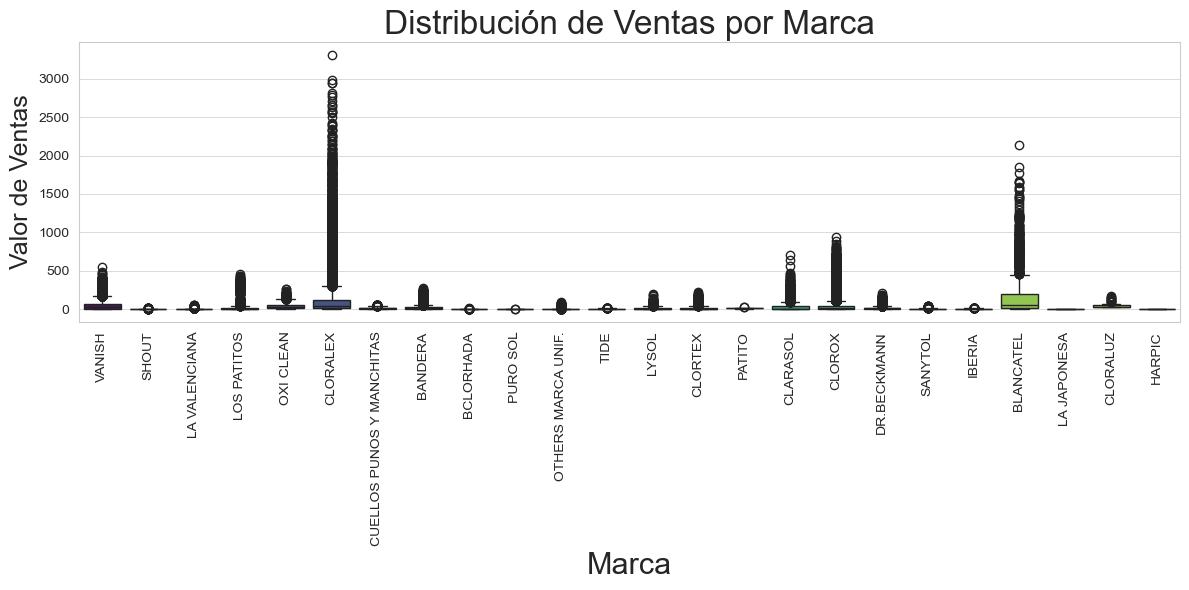

In [ ]:
sns.set_style("whitegrid") 
plt.figure(figsize=(12,6))

sns.boxplot(data=df, y='TOTAL_VALUE_SALES', x='BRAND', hue='BRAND', palette='viridis')

plt.xticks(rotation=90)
plt.title('Distribución de Ventas por Marca', fontsize=24)
plt.xlabel('Marca', fontsize=22)
plt.ylabel('Valor de Ventas', fontsize=18)

plt.savefig("Distribución de Ventas por Marca")

plt.tight_layout()
plt.show()



#### Como podemos notar nuestro grafico resulto con un problema de valores anomalos, entonces no podemos ver bien la representacion, vamos a corregir eso

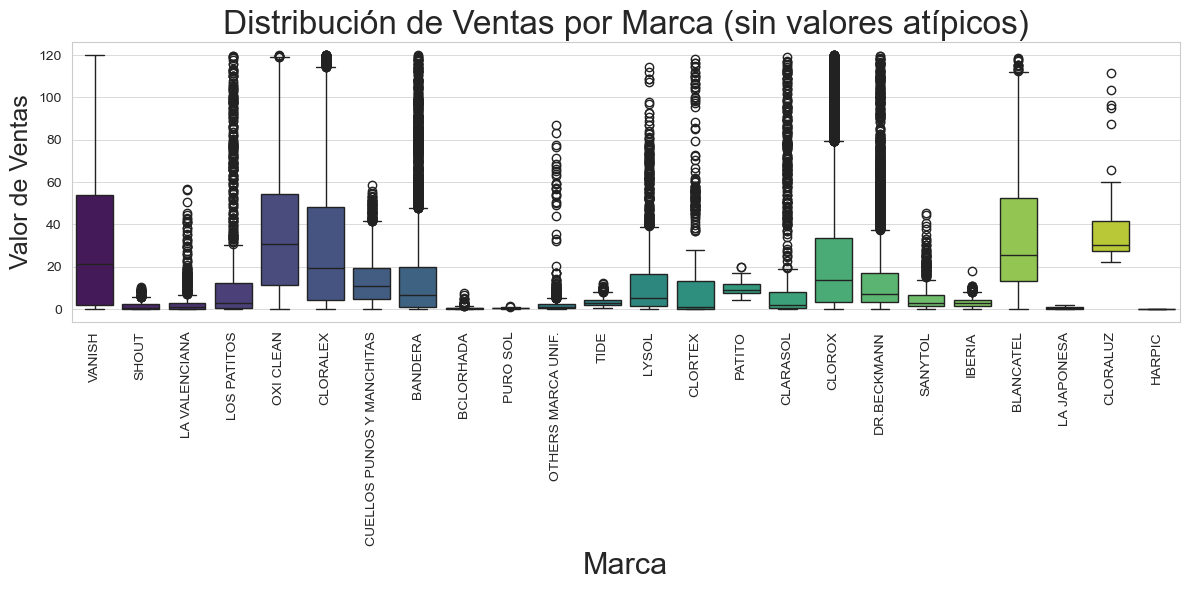

In [ ]:
Q1 = df['TOTAL_VALUE_SALES'].quantile(0.25)
Q3 = df['TOTAL_VALUE_SALES'].quantile(0.75)
IQR = Q3 - Q1
valor_bajo = Q1 - 1.5 * IQR
valor_alto = Q3 + 1.5 * IQR
df_filtrado = df[(df['TOTAL_VALUE_SALES'] >= valor_bajo) & (df['TOTAL_VALUE_SALES'] <= valor_alto)]
plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtrado, y='TOTAL_VALUE_SALES', x='BRAND', hue='BRAND', palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribución de Ventas por Marca (sin valores atípicos)', fontsize=24)
plt.xlabel('Marca', fontsize=22)
plt.ylabel('Valor de Ventas', fontsize=18)
plt.savefig("Distribución de Ventas por Marca (sin valores atípicos)")
plt.tight_layout()
plt.show()

#### Tambien vamos a hacer una grafica con la distribucion de venta con "ATTR1" para ver la consistencia en venta tanto en productos como marcas

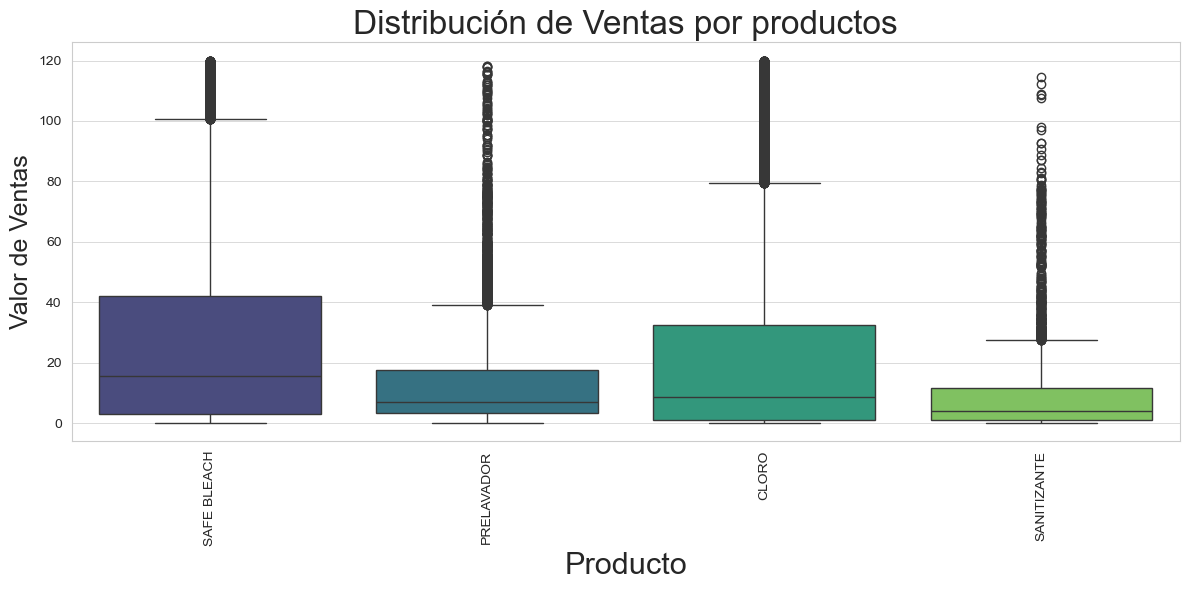

In [ ]:


plt.figure(figsize=(12,6))
sns.boxplot(data=df_filtrado, y='TOTAL_VALUE_SALES', x='ATTR1', hue='ATTR1', palette='viridis') 
plt.xticks(rotation=90) #                                                                       
plt.title('Distribución de Ventas por productos', fontsize=24)
plt.xlabel('Producto', fontsize=22)
plt.ylabel('Valor de Ventas', fontsize=18)
plt.savefig('Distribucion de ventas por productos')
plt.tight_layout()
plt.show()

### PRIMERAS CONCLUSIONES
- Hay bastantes valores atipicos en la venta de cloro entonces habría que tomar en cuenta para la distribucion, si esto ocurre cada ciertas fechas habría que estar prevenidos para estas tendencias
- El producto 'SAFE BLEACH' es el producto con mas ventas promedio, No podemos llegar a la conclusion si es el producto mas exitoso pero si es el producto mas seguro para las venta
- Las marcas 'Harpic', 'La japonesa', 'Puro sol' en este lapso de tiempo no parece que tengan muchas ventas, habria que ver si es el producto, por la distribucion, algo que los relacione
- La marca 'Blanca tel' y cloralex son las marcas con mas valores atipicos, a pesar de que la marca 'Blancatel' no tiene muchas ventas promedio gracias a las ventas "atipicas" que tiene el cloro esta marca sube sus ventas promedio

### 2.-EMPECEMOS A VER LAS VENTAS CON RESPECTO AL TIEMPO PARA SACAR MAS CONCLUSIONES

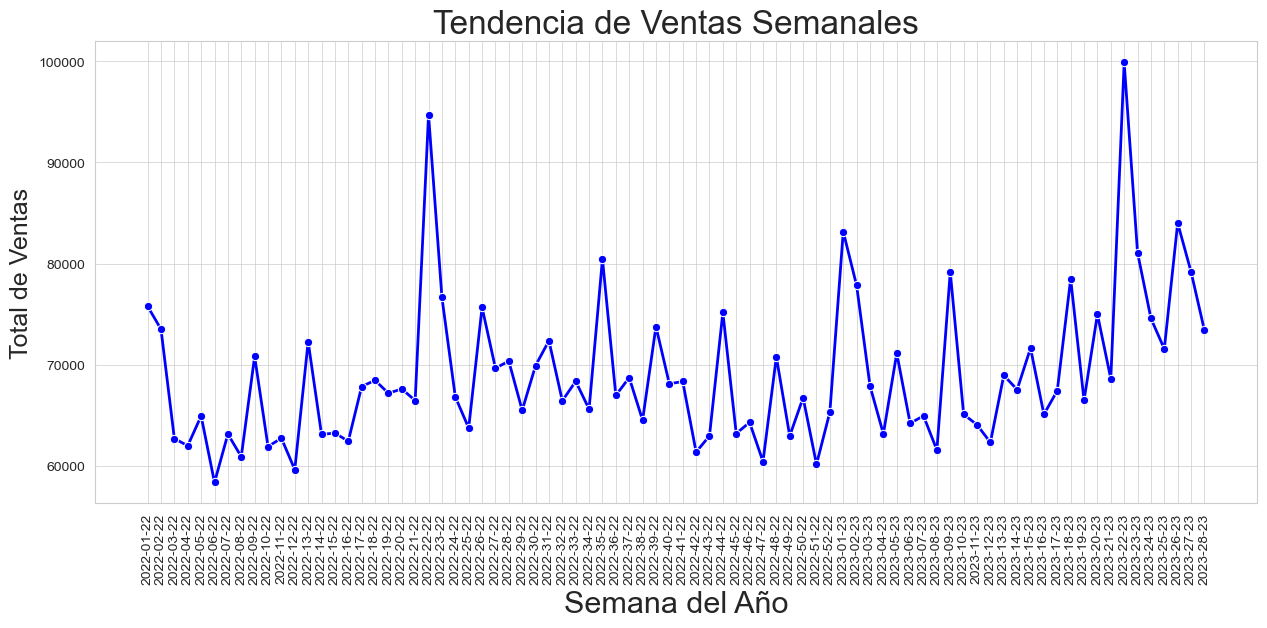

In [ ]:

df['YEAR_WEEK'] = df['YEAR'].astype(str) + '-' + df['WEEK']
df_time = df.groupby('YEAR_WEEK')['TOTAL_VALUE_SALES'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_time, x='YEAR_WEEK', y='TOTAL_VALUE_SALES', marker="o", color="b")
plt.title('Tendencia de Ventas Semanales', fontsize=24)
plt.xlabel('Semana del Año', fontsize=22)
plt.ylabel('Total de Ventas', fontsize=18)
plt.xticks(rotation=90)  
plt.savefig('Tendendia de ventas semanales')
plt.show()

#### Una vez viendo el total de ventas a travez del tiempo vamos a responder las preguntas
- Los valores atipicos del cloro
- Que marca ha tenido mas ventas al paso del tiempo (la mas Exitosa)
- Venta de regiones si alguna region tiene alguna tendencia en venta por el tiempo

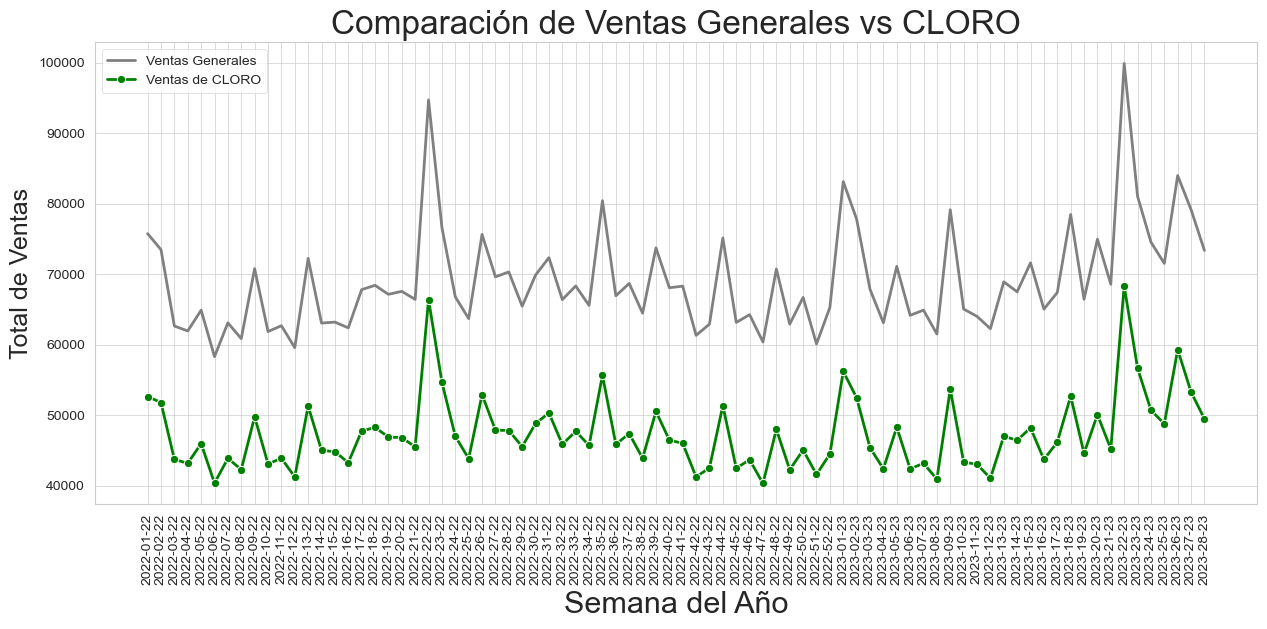

In [ ]:

df_producto = df[df['ATTR1'] == "CLORO"]

df_producto_time = df_producto.groupby('YEAR_WEEK')['TOTAL_VALUE_SALES'].sum().reset_index()

df_general_time = df.groupby('YEAR_WEEK')['TOTAL_VALUE_SALES'].sum().reset_index()
plt.figure(figsize=(15, 6))

sns.lineplot(data=df_general_time, x='YEAR_WEEK', y='TOTAL_VALUE_SALES', label='Ventas Generales', color='gray')

sns.lineplot(data=df_producto_time, x='YEAR_WEEK', y='TOTAL_VALUE_SALES', label='Ventas de CLORO', color='green', marker="o")

plt.title('Comparación de Ventas Generales vs CLORO', fontsize=24)
plt.xlabel('Semana del Año', fontsize=22)
plt.ylabel('Total de Ventas', fontsize=18)
plt.xticks(rotation=90)
plt.legend()

plt.savefig('Comparacion de ventas generales vs cloro')

plt.show()

#### La venta de cloro sube con respecto a las ventas generales, pero al parecer hay un patron en las semanas "22" del año, ya que tanto en el 2022 como en el 2023 hay mayores ventas de cloro y de productos de limpieza en general


### CUAL ES LA MARCA MAS EXITOSA QUE TENEMOS?
- Veamos como son las ventas de cada marca por el paso del tiempo

In [ ]:
df_ventas_por_marca = df.groupby(['BRAND', 'YEAR'])['TOTAL_VALUE_SALES'].sum().reset_index()
df_ventas_totales_por_marca = df.groupby('BRAND')['TOTAL_VALUE_SALES'].sum().reset_index()
df_ventas_totales_por_marca = df_ventas_totales_por_marca.sort_values(by='TOTAL_VALUE_SALES', ascending=False)
df_ventas_totales_por_marca.head(5)

,BRAND,TOTAL_VALUE_SALES
4,CLORALEX,5393618.509
23,VANISH,2168289.525
6,CLOROX,1371751.724
2,BLANCATEL,652484.021
17,OXI CLEAN,436970.719


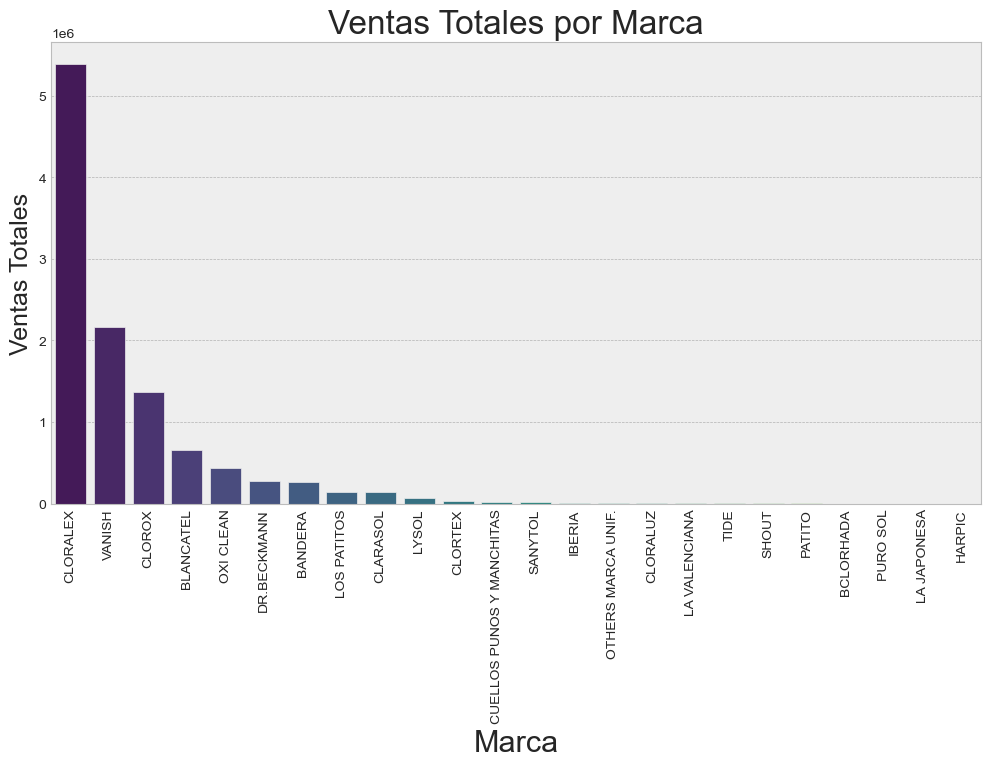

In [ ]:

plt.style.use("bmh")
plt.figure(figsize=(12,6))
sns.barplot(data=df_ventas_totales_por_marca, x='BRAND', y='TOTAL_VALUE_SALES', palette='viridis',hue='BRAND')
plt.xticks(rotation=90)
plt.title("Ventas Totales por Marca",fontsize=24)
plt.xlabel("Marca",fontsize=22)
plt.ylabel("Ventas Totales",fontsize=18)

plt.savefig('Ventas totales por marca')

plt.show()

#### Cloralex es la marca mas exitosa en las ventas a travez del tiempo, pero no es del todo segura ya que hemos visto que su mejor producto tiene bastantes ventas anomalas y no ventas constantes para mas seguridad
Habria que revisar que productos tienen la mayor constante de ventas para ser un producto seguro

- Veamos como son las ventas por region para ver si encontramos algun patron

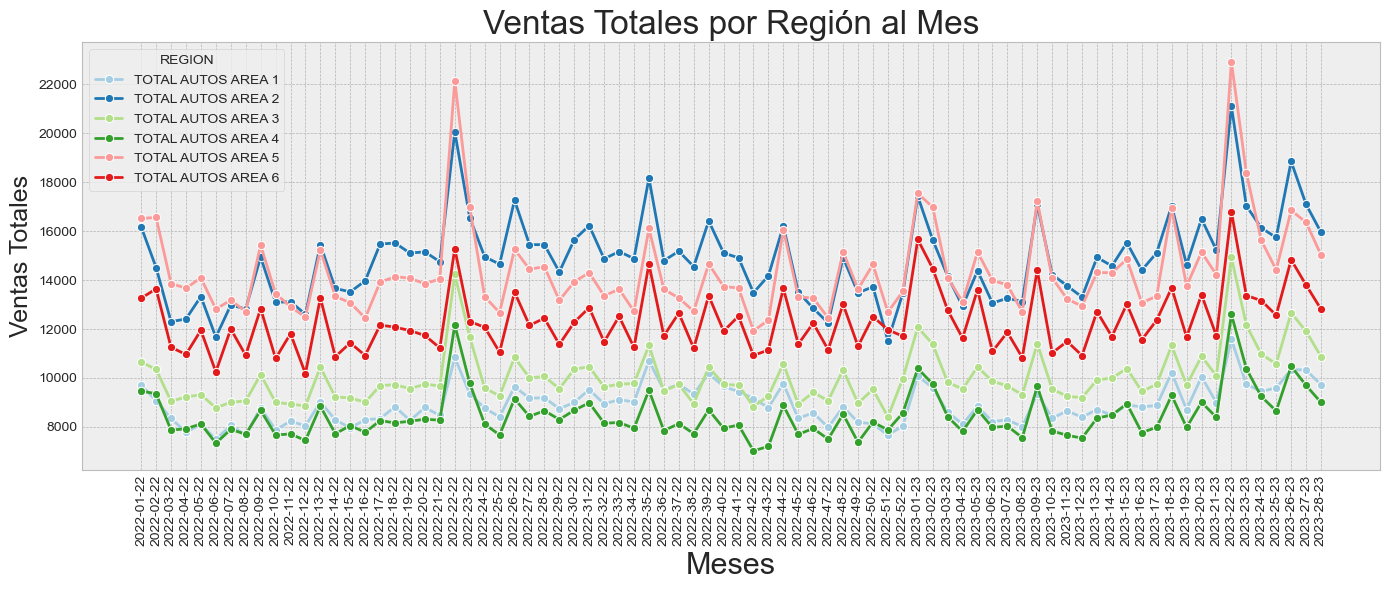

In [ ]:
df_time = df.groupby('YEAR_WEEK')['TOTAL_VALUE_SALES'].sum().reset_index()
df_ventas_por_region_al_mes = df.groupby(['YEAR_WEEK','REGION'])['TOTAL_VALUE_SALES'].sum().reset_index()
df_ventas_por_region_al_mes = df_ventas_por_region_al_mes[df_ventas_por_region_al_mes['REGION'] != 'TOTAL AUTOS SCANNING MEXICO']
plt.style.use("bmh")
plt.figure(figsize=(14,6))
sns.lineplot(data=df_ventas_por_region_al_mes, x='YEAR_WEEK', y='TOTAL_VALUE_SALES',palette='Paired', hue='REGION', marker='o')
plt.title('Ventas Totales por Región al Mes', fontsize=24)
plt.xlabel('Meses', fontsize=22)
plt.ylabel('Ventas Totales', fontsize=18)
plt.xticks(rotation=90)
plt.savefig('Ventas totales por region al mes')
plt.tight_layout()
plt.show()


#### Teniendo las ventas por region al parecer no hay nada atipico, todas parecen presentar el mismo patron de altas y bajas, la unica conclusion que podemos sacar es que "Area 5" tiene una mejor tendencia a vender mas cuando hay mayores ventas generales y "Area 2" tiene mayores ventas promedio

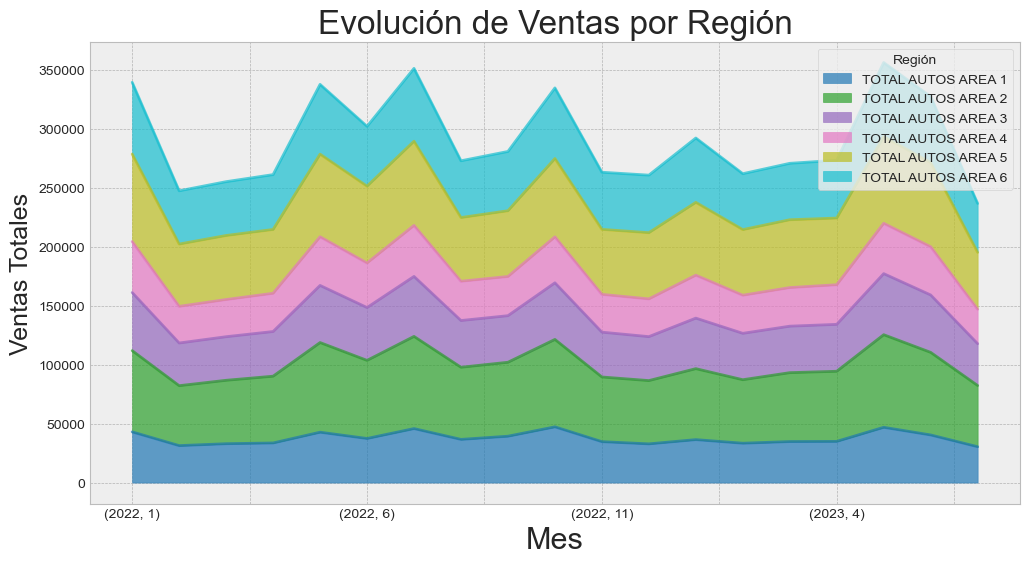

In [ ]:

df_ventas_por_region_al_mes = df.groupby(['YEAR','MONTH','REGION'])['TOTAL_VALUE_SALES'].sum().reset_index()
df_VPRM=df_ventas_por_region_al_mes.pivot_table( index=['YEAR', 'MONTH'],columns='REGION', values='TOTAL_VALUE_SALES',aggfunc='sum').reset_index()
df_VPRM.set_index(['YEAR', 'MONTH']).plot(
    kind='area', figsize=(12, 6), alpha=0.7, colormap="tab10"
)
plt.title("Evolución de Ventas por Región", fontsize=24)
plt.xlabel("Mes", fontsize=22)
plt.ylabel("Ventas Totales",fontsize=18)
plt.legend(title="Región", loc="upper right")

plt.savefig('Evolucion de ventas por region')
plt.show()

### SEGUNDAS CONCLUSIONES
- La venta general de los productos sube repentinamente en las semanas 22 de cada año, es un dato a tener presente para tener toda la logistica y distribucion sobre la media
- El producto "Cloro" y la marca "Cloralex" es lo que mas rendimiento nos da en las ventas, ademas de ser la mitad de nuestras ventas mes con mes, el cliente tiene preferencia por este producto, ademas de tener una relacion directa de la influencia en nuestras ventas
- Mas de 11 marcas estan con ventas casi nulas, puede que sea un error de la limpieza de datos
- Las areas con mayor rendimiento son el area 5 y 6
- Area 5" tiene una mejor tendencia a vender mas cuando hay mayores ventas generales y "Area 6" tiene mayores ventas promedio

### Averiguando si hay algun patron de las ventas anormales
sabemos que las ventas anormales que tenememos en la primer parte posiblemente se deban a las semanas de "22" del año, pero esto cambia dependiendo la region?

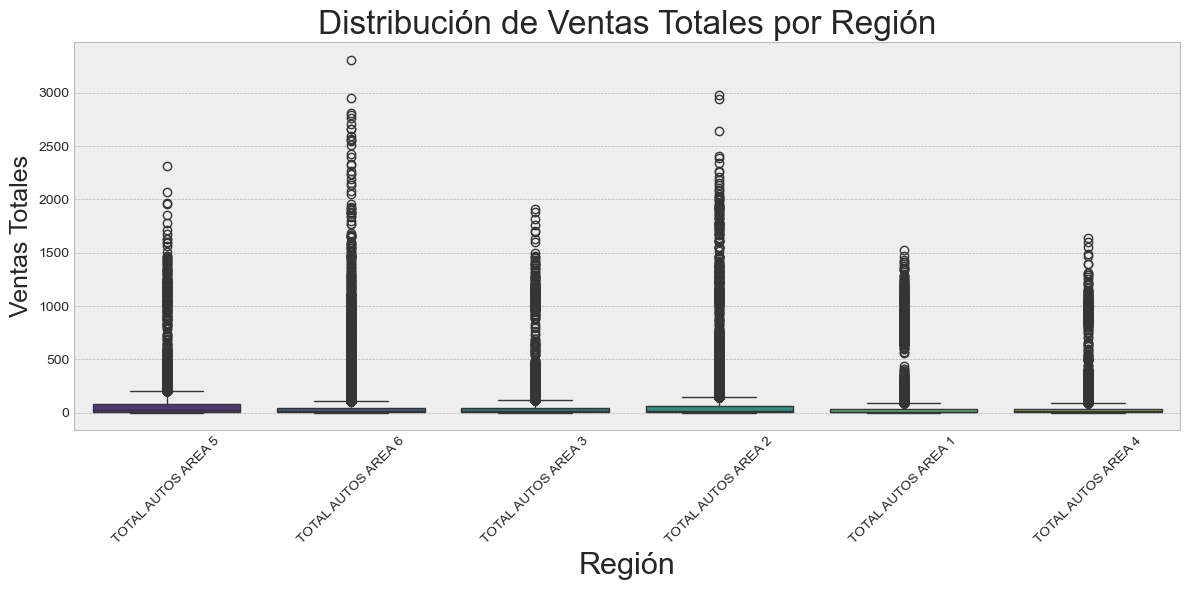

In [ ]:

df = df[df['REGION'] != 'TOTAL AUTOS SCANNING MEXICO']
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='REGION', y='TOTAL_VALUE_SALES', palette='viridis',hue='REGION')
plt.title('Distribución de Ventas Totales por Región', fontsize=24)
plt.xlabel('Región', fontsize=22)
plt.ylabel('Ventas Totales', fontsize=18)
plt.xticks(rotation=45) 

plt.savefig('Distribucion de ventas totales por region')

plt.tight_layout() 
plt.show()

### Podemos ver que si bien area 5 es el area con mas ventas promedio, area 2 y 6 son las que comparten mas valores atipicos

### CONCLUSIONES FINALES
- Dar mas preferencia a las areas que tienen los valores atipicos en fechas donde podria esperar una subida de ventas
- Comprobar porque el cloro es el producto mas vendido, porque la gente lo prefiere sobre otros productos? asi tener mas herramientas para mejorar los otros productos con bajas ventas
- Comprobar porque en el "Area 2" hay tantas ventas atipicas pero no hay tantas ventas promedio y con ello mejorar todas nuestras areas
- Tomar en cuenta las bajas ventas de 11 marcas, que caracteristicas tienen para no replicarlas en un futuro